In [1]:
import pandas as pd
from project_utils import *
from matplotlib.ticker import AutoMinorLocator, LogLocator


In [2]:
# df1 = pd.read_csv('dist_cat.csv')
# df2 = pd.read_csv('objects.csv')

In [3]:
# df = pd.merge(df1, df2, on='SNR_Name', how='inner')

In [4]:
# df = df.drop(columns=['Distance_kpc'])

In [5]:
# df.rename(columns={'Literature Dist. (kpc)': 'Distance_kpc'}, inplace=True)
# df.to_csv('dist_cat2.csv', index=False)

In [6]:
# df = process_raw_distance_cat(df)

In [7]:
df = pd.read_csv('dist_cat2.csv')

In [8]:
# Select the last 3 columns
df_spec = df[-1:]
df_spec = df_spec.reset_index(drop=True)
df_spec

#     SNR_Name Distance_kpc              Method V_LSR (km/s)  References  \
0  999  G180.0-01.7     1.3±0.22  Kinematic distance           20          20   

  Revised Dist. (kpc) Galactocentric Dist. (kpc)       Object     RA  \
0                   L                        1.2  G180.0-01.7  84.75   

         Dec  Ang_size  radius  pm_thresh Distance_Info  median_dist  \
0  27.833333     180.0   270.0         20           NaN          1.3   

   median_dist_error  
0               0.22

In [9]:
df_new,dfs = make_catalogue(df,load=True)

In [10]:
dfs.keys()

dict_keys(['G024.7+00.6', 'G043.9+01.6', 'G065.3+05.7', 'G065.7+01.2', 'G067.6+00.9', 'G067.7+01.8', 'G069.0+02.7', 'G073.9+00.9', 'G078.2+02.1', 'G160.9+02.6', 'G166.0+04.3', 'G181.1+09.5', 'G189.1+03.0', 'G189.6+03.3', 'G205.5+00.5', 'G206.9+02.3', 'G279.0+01.1', 'G180.0-01.7'])

In [11]:
df_new.head()

source_id          ra        dec  parallax  parallax_error  \
0  4252900157227107968  278.649839  -7.141387  0.365408        0.014205   
1  4255905981507987328  278.521285  -6.973591  0.401438        0.016385   
2  4252908021300114560  278.628303  -7.027900  0.394516        0.016083   
3  4312299314438455424  286.392191  10.353746  0.449009        0.018155   
4  4312480493347107072  286.298843  10.315299  0.395567        0.017828   

       pmra     pmdec         pm  phot_g_mean_mag     bp_rp  ...  Ang_size  \
0 -0.050460 -2.101928   2.102533        13.046144  2.471680  ...      30.0   
1 -0.837436 -1.368805   1.604658        12.757184  1.310301  ...      30.0   
2  0.228784 -3.037569   3.046173        13.517707  2.659662  ...      30.0   
3 -6.328243 -8.229850  10.381575        13.849354  2.696686  ...      60.0   
4 -1.043500 -3.387818   3.544884        13.901791  1.608985  ...      60.0   

  median_dist  median_dist_error      snr_ra    snr_dec      dist_pc  \
0         3.5                0.2  278.541667  -7.083333  2736.670664   
1         3.5                0.2  278.541667  -7.083333  2491.047162   
2         3.5                0.2  278.541667  -7.083333  2534.752667   
3         3.1                1.2  286.458333  10.500000  2227.124929   
4         3.1                1.2  286.458333  10.500000  2528.014687   

      pm_km_s   total_vel       snr_sep      score  
0   27.273677         NaN    439.318000  30.729792  
1   18.947097         NaN    401.728655  23.447773  
2   36.598938   51.789906    368.281814  22.010630  
3  109.593846  132.512088  68792.492390  52.205480  
4   42.477604         NaN  68530.069186  49.986128  

[5 rows x 22 columns]

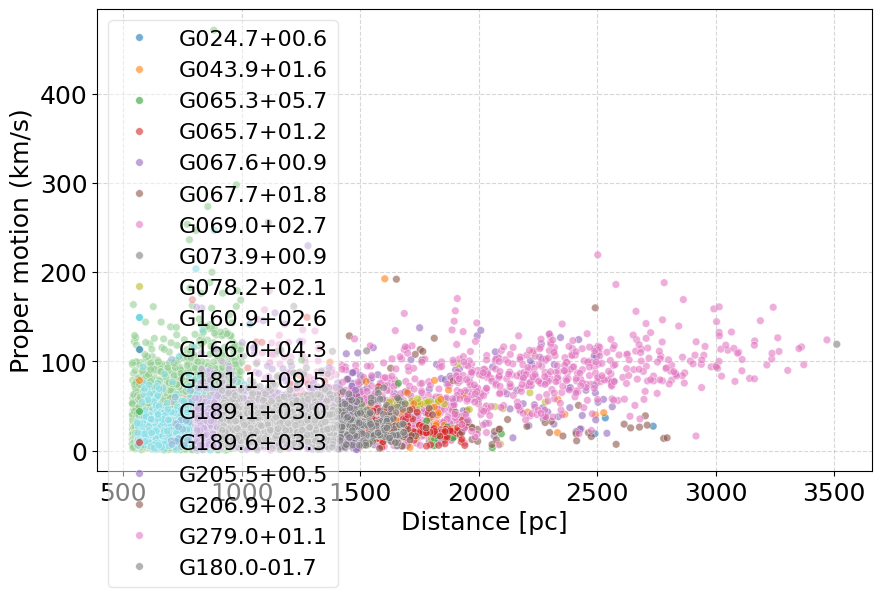

In [12]:
plot_pm_vs_radial_velocity(df_new,median_dist=False)

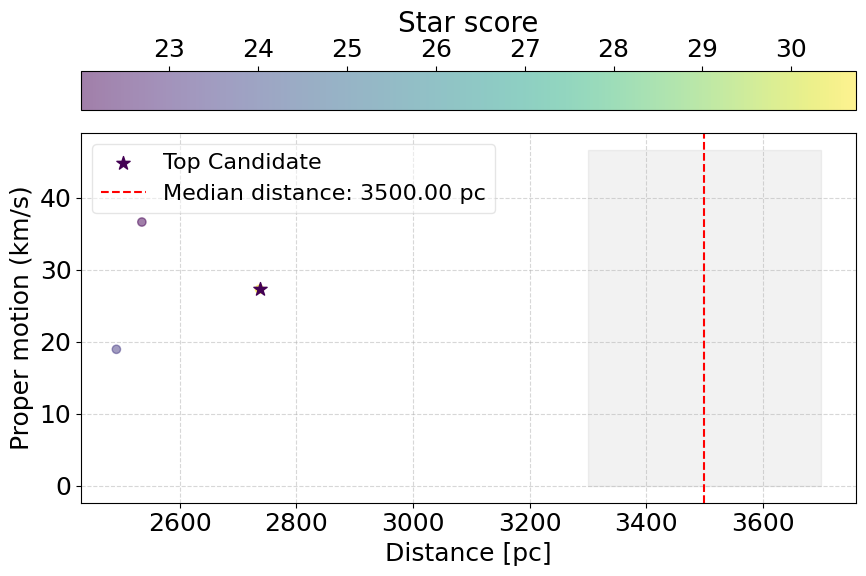

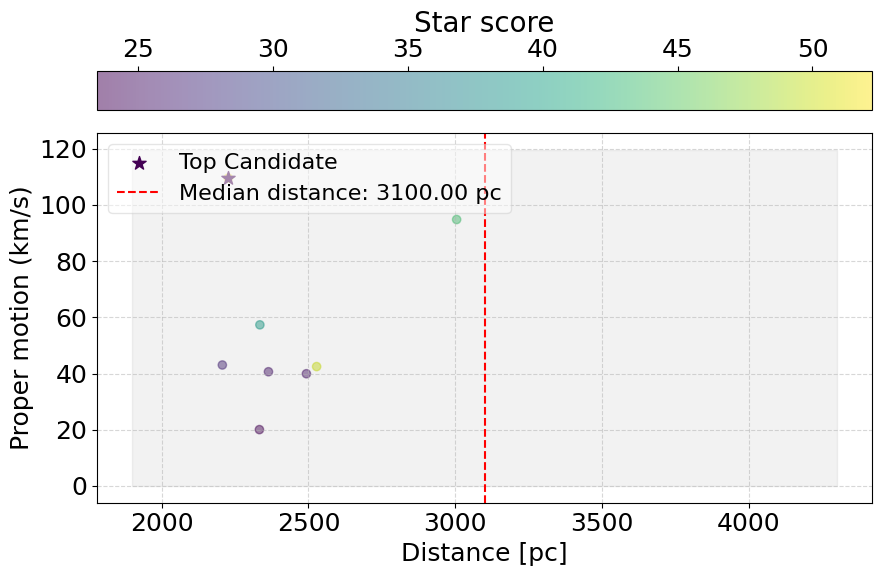

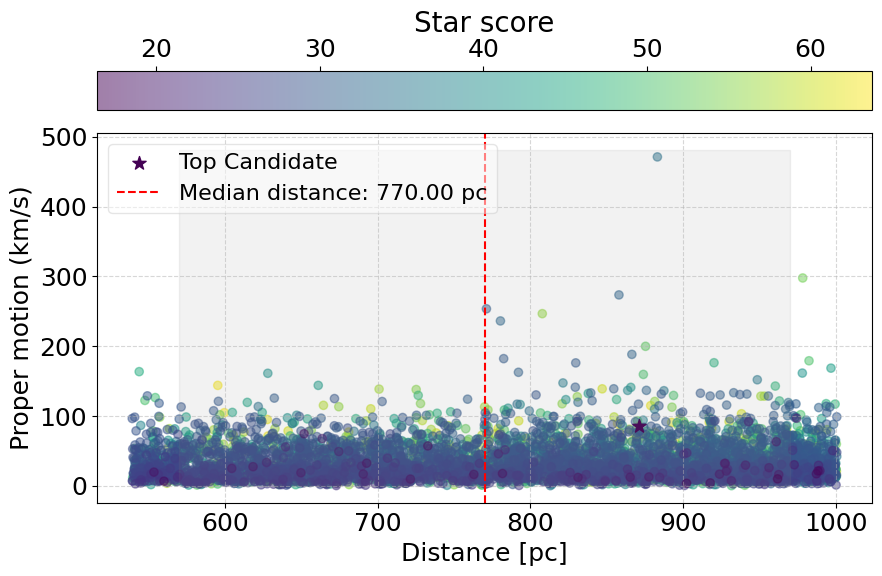

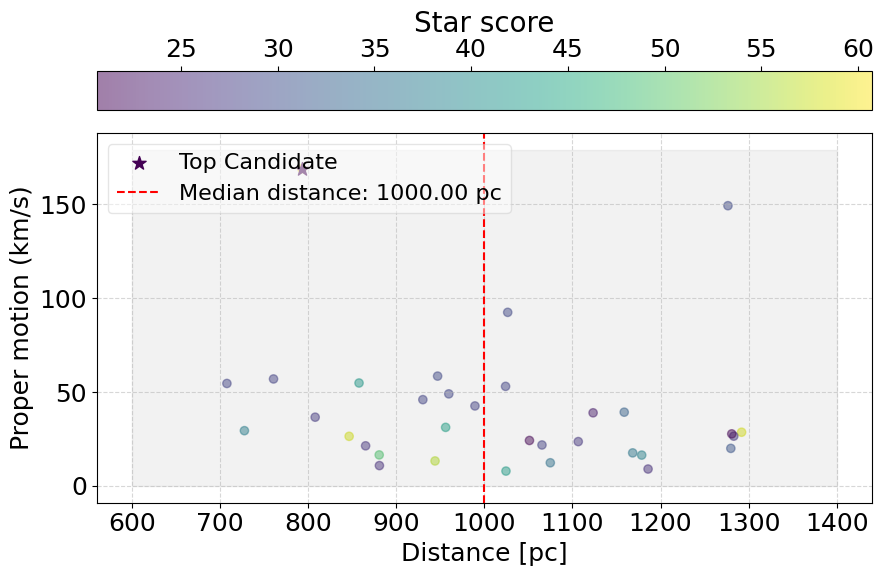

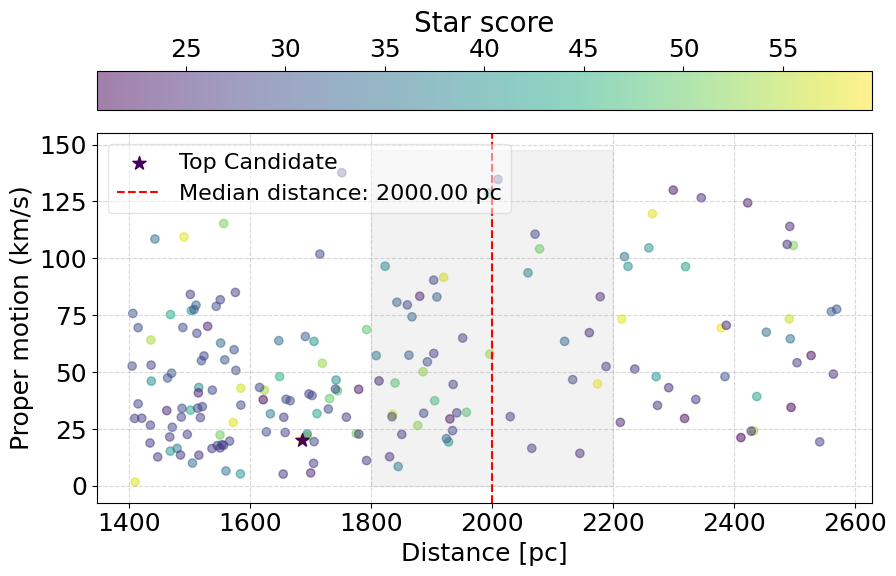

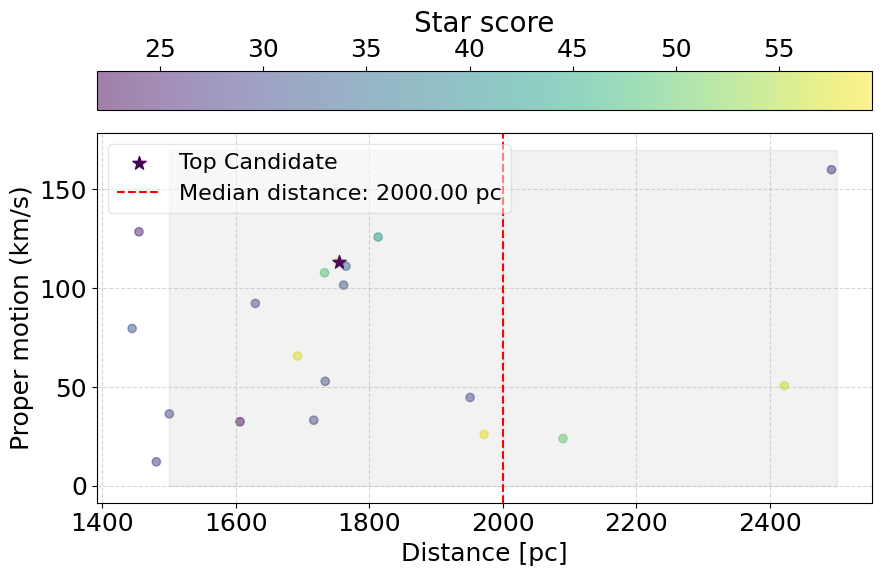

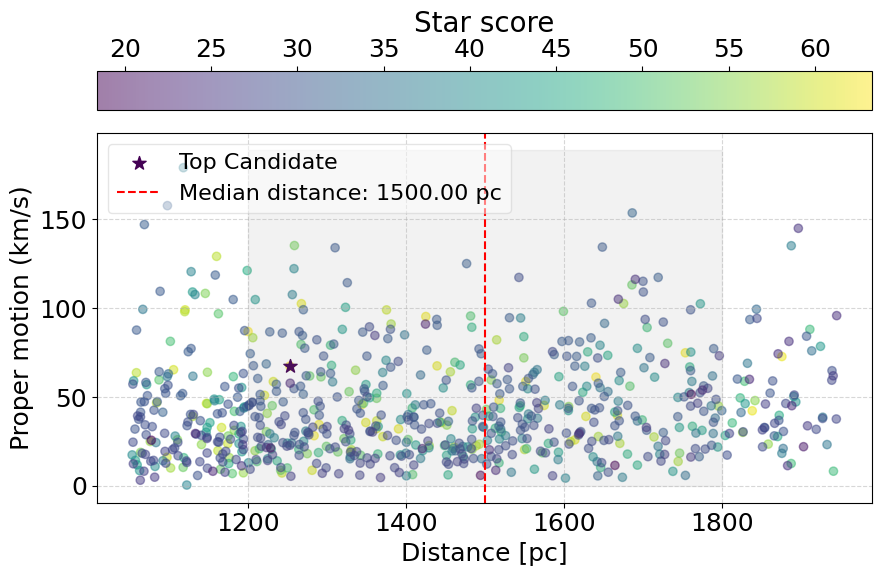

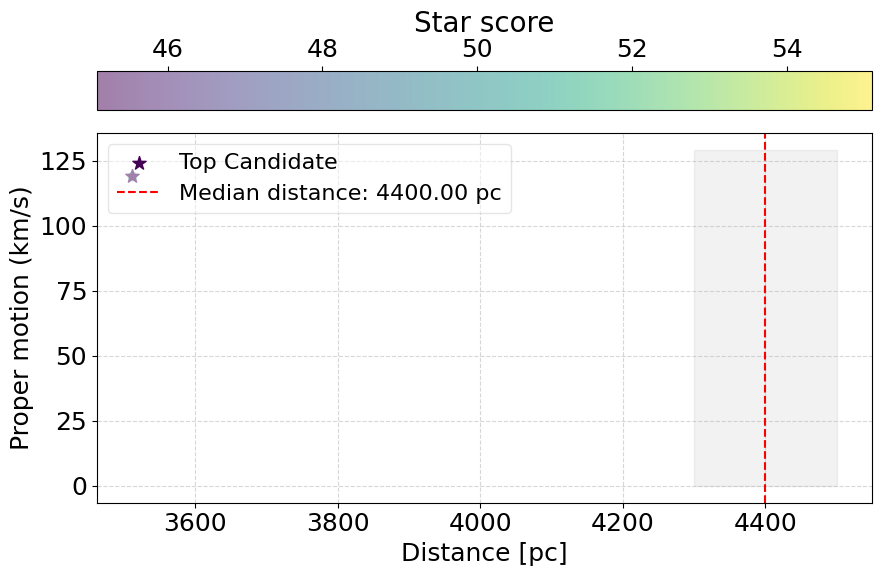

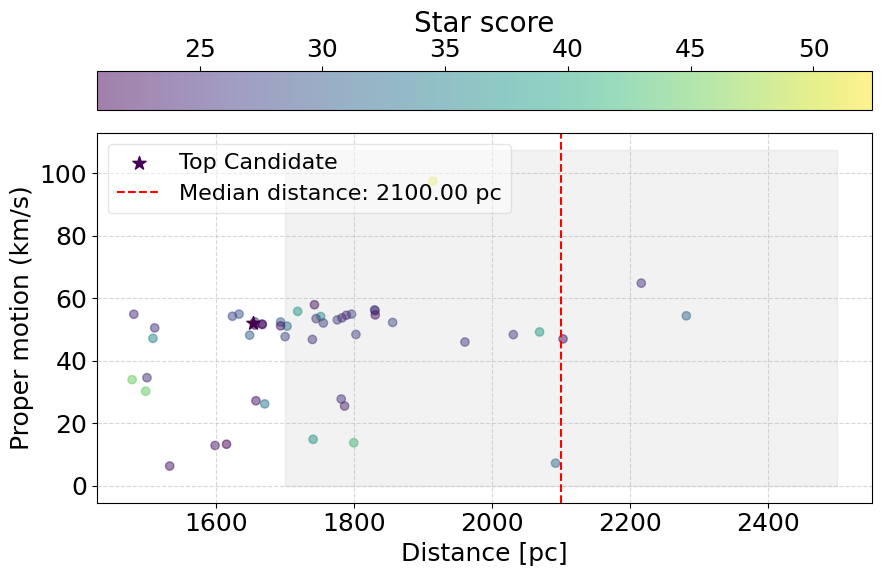

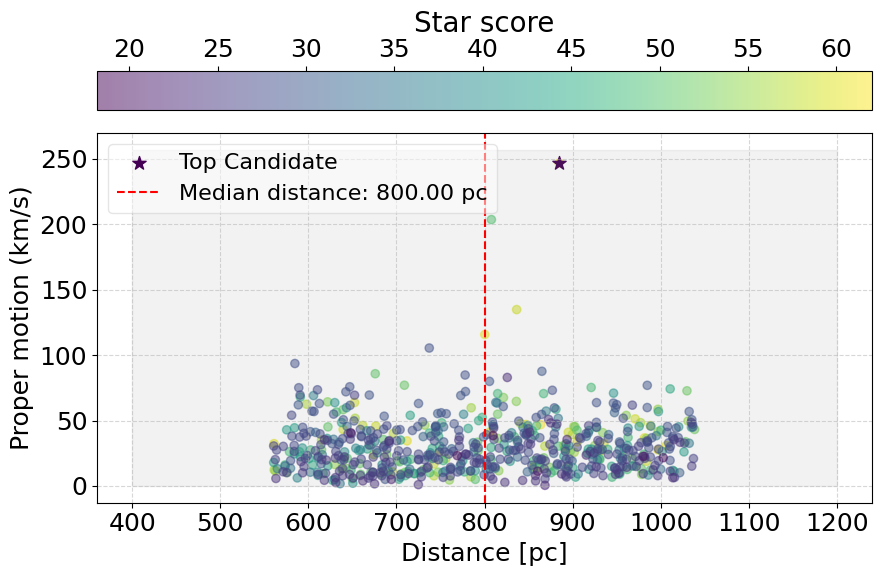

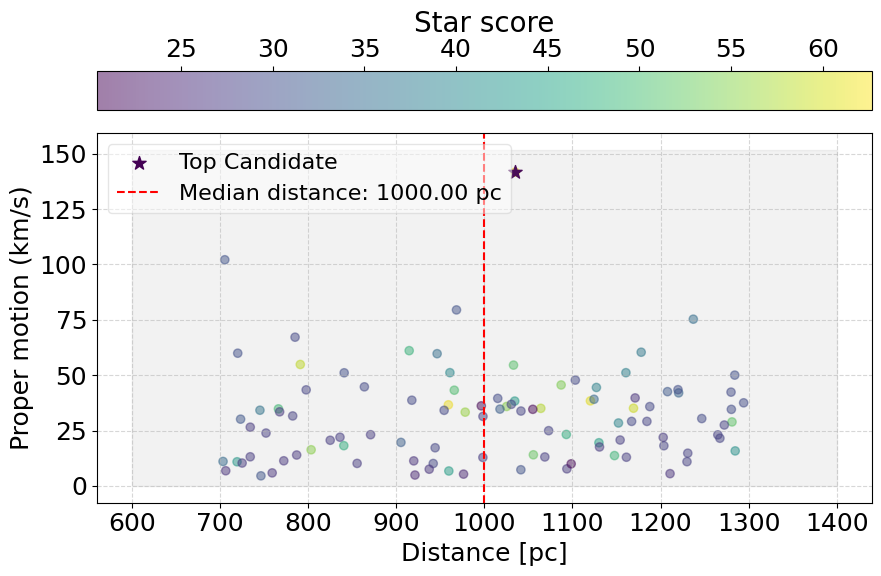

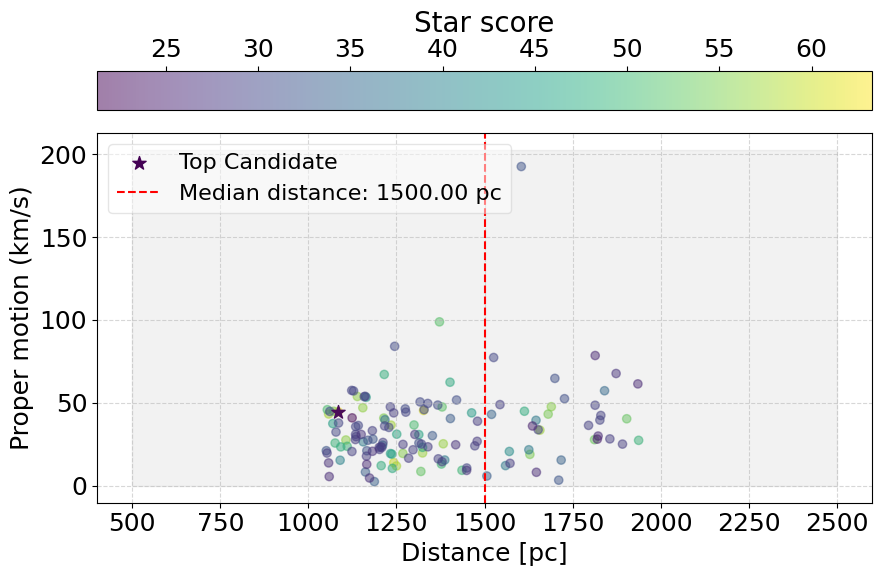

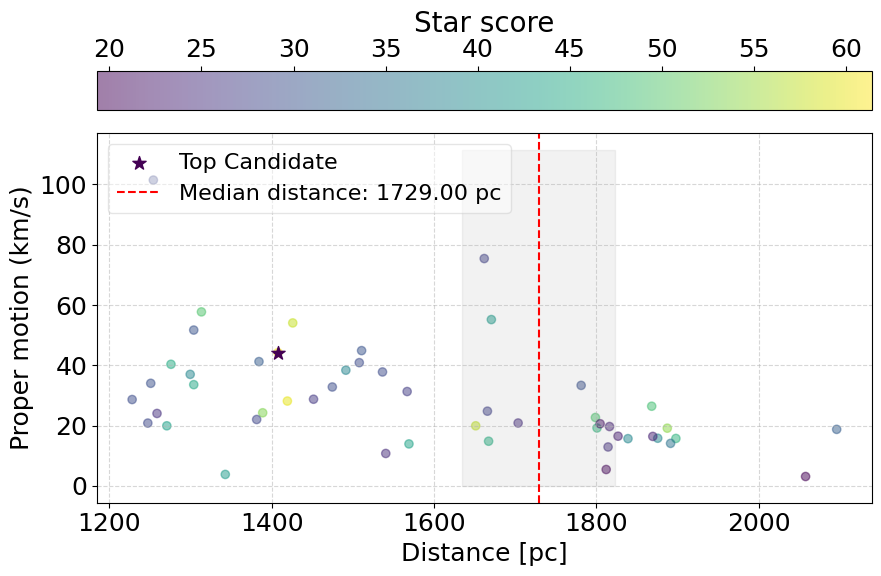

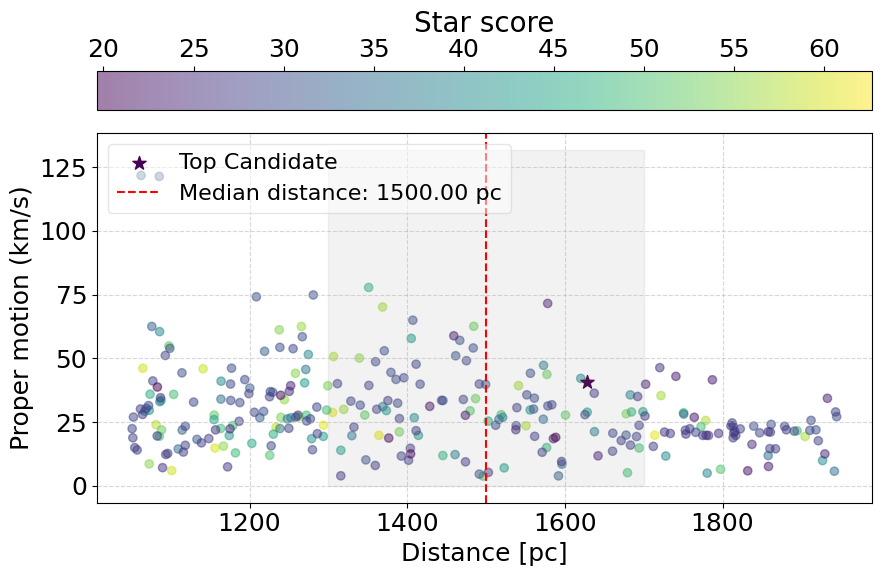

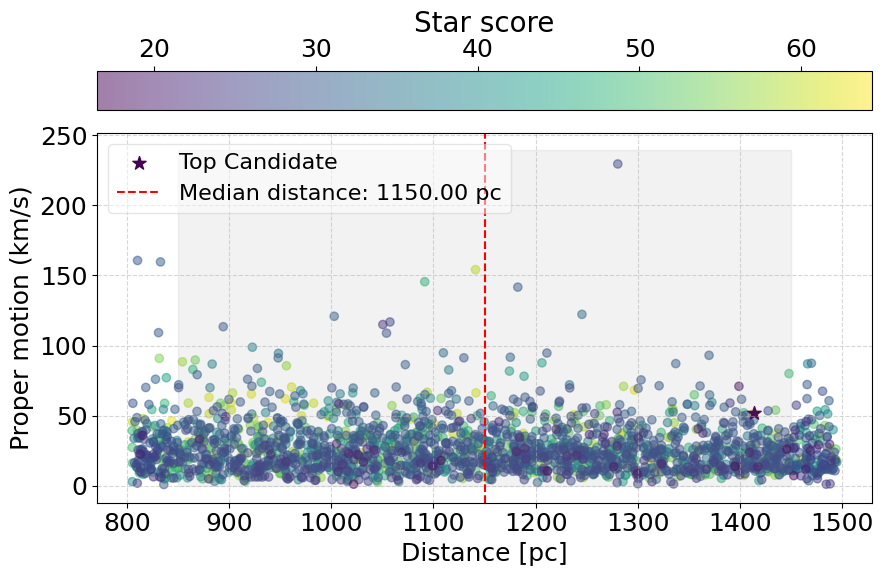

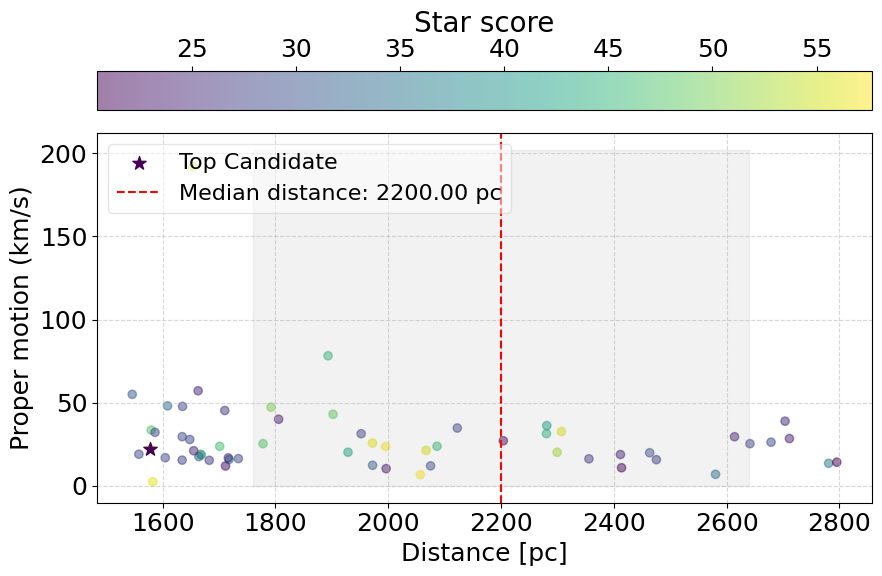

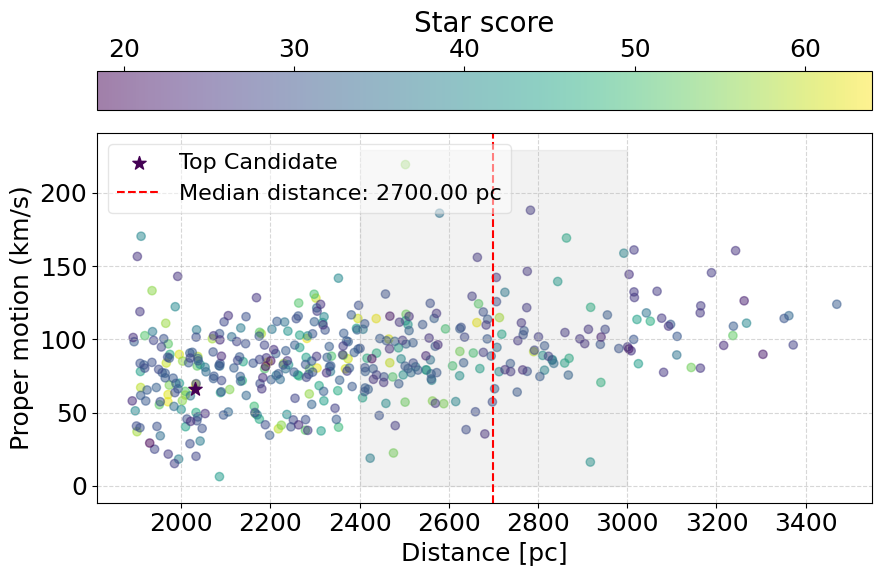

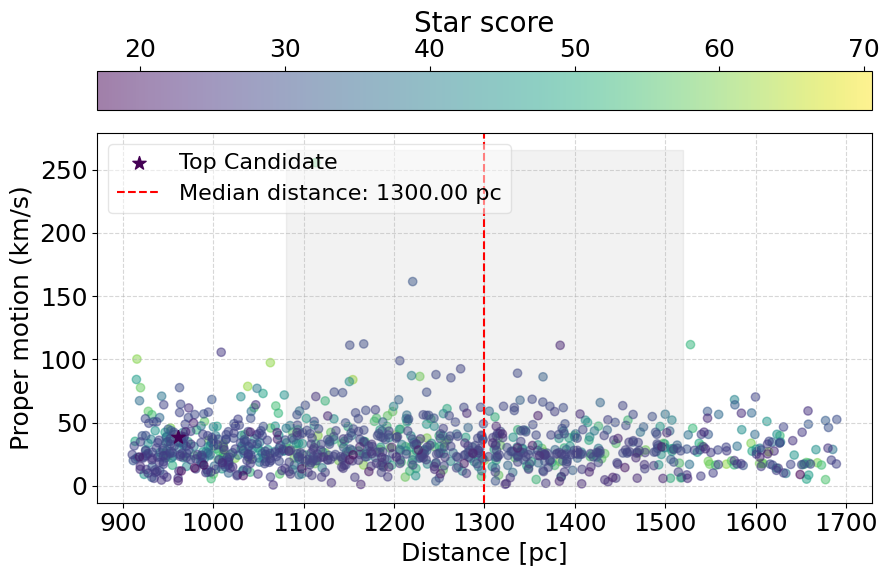

In [13]:
for name,df_t in dfs.items():
    if len(df_t[df_t["pm_km_s"] > 0]) > 0:
        plot_pm_vs_radial_velocity(df_t,median_dist=True,make_title=False,add_score=True)

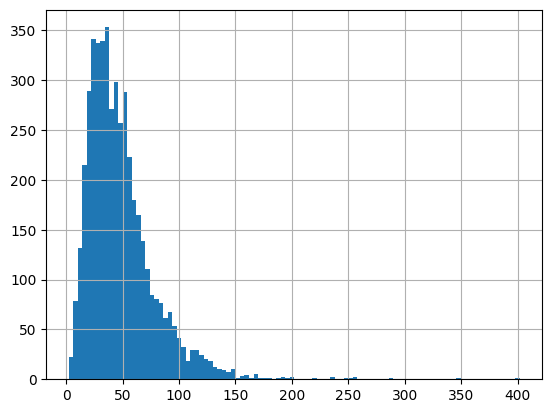

In [14]:
df_new["total_vel"].hist(bins=100)

plt.show()

In [15]:
dfs['G180.0-01.7']

source_id         ra        dec  parallax  parallax_error  \
0     3442480922709635840  84.750928  27.826729  1.040282        0.039776   
1     3441719059933990912  84.840765  27.516076  0.866292        0.041740   
2     3441677969983701504  84.983813  27.332226  0.619415        0.025596   
3     3441723221759090560  84.781182  27.599395  0.831663        0.040057   
4     3441628869917598464  85.051441  27.209064  0.963328        0.043527   
...                   ...        ...        ...       ...             ...   
1007  3442572418396622336  84.328731  28.379551  0.967979        0.013536   
1008  3442064242162875008  84.254398  27.284203  1.010677        0.013614   
1009  3442586402809858816  85.080622  28.160869  0.866079        0.014406   
1010  3441681337238059264  84.928232  27.384262  0.606332        0.023019   
1011  3441711913108502656  85.365548  27.605941  1.021149        0.016897   

          pmra      pmdec         pm  phot_g_mean_mag     bp_rp  ...  \
0    -1.483609  -8.359728   8.490356        15.885692  1.274370  ...   
1     4.040182 -14.810586  15.351760        14.940067  1.227202  ...   
2     1.530642  -3.183450   3.532311        14.330002  0.817458  ...   
3     0.844211  -7.055143   7.105473        15.207379  1.194543  ...   
4     7.671547 -14.035200  15.994982        15.491631  1.268196  ...   
...        ...        ...        ...              ...       ...  ...   
1007  0.604067  -1.550330   1.663857        12.015969  1.886023  ...   
1008  0.976501   3.380933   3.519128        10.824182  1.571908  ...   
1009  0.354295  -4.482334   4.496314        10.552760  1.829459  ...   
1010  1.073441   0.424321   1.154264        10.988529  1.875785  ...   
1011 -1.138621  -2.844297   3.063737        10.045868  1.509769  ...   

      Ang_size median_dist  median_dist_error  snr_ra    snr_dec      dist_pc  \
0        180.0         1.3               0.22   84.75  27.833333   961.278075   
1        180.0         1.3               0.22   84.75  27.833333  1154.345351   
2        180.0         1.3               0.22   84.75  27.833333  1614.426853   
3        180.0         1.3               0.22   84.75  27.833333  1202.409988   
4        180.0         1.3               0.22   84.75  27.833333  1038.067578   
...        ...         ...                ...     ...        ...          ...   
1007     180.0         1.3               0.22   84.75  27.833333  1033.080652   
1008     180.0         1.3               0.22   84.75  27.833333   989.435583   
1009     180.0         1.3               0.22   84.75  27.833333  1154.629366   
1010     180.0         1.3               0.22   84.75  27.833333  1649.262244   
1011     180.0         1.3               0.22   84.75  27.833333   979.288660   

        pm_km_s   total_vel      snr_sep      score  
0     38.685951         NaN    23.958718  70.534794  
1     83.998643  101.923075  1178.214124  62.491081  
2     27.030595         NaN  1952.168608  62.129960  
3     40.497096         NaN   848.022075  62.054474  
4     78.702354         NaN  2444.759454  61.962303  
...         ...         ...          ...        ...  
1007   8.147576   13.406070  2378.264759  18.813095  
1008  16.504447   26.164110  2531.768113  18.444884  
1009  24.608071   25.248321  1579.503634  17.789581  
1010   9.023458   39.117259  1713.723752  17.211521  
1011  14.221343   14.228280  2125.604507  17.017619  

[1012 rows x 22 columns]

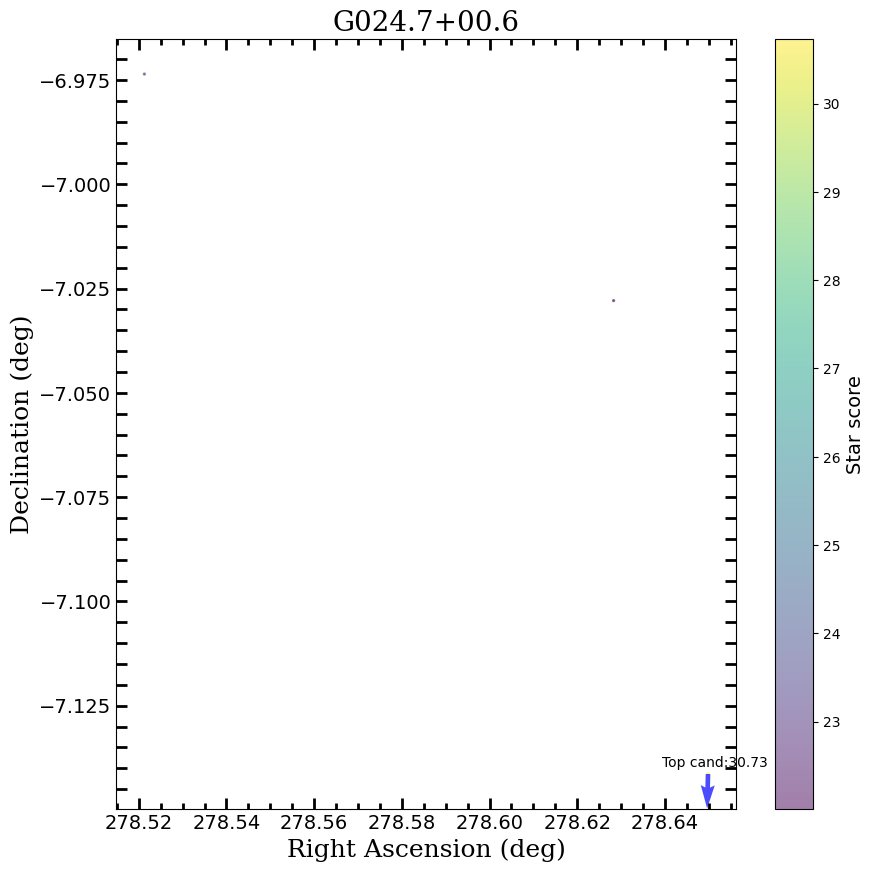

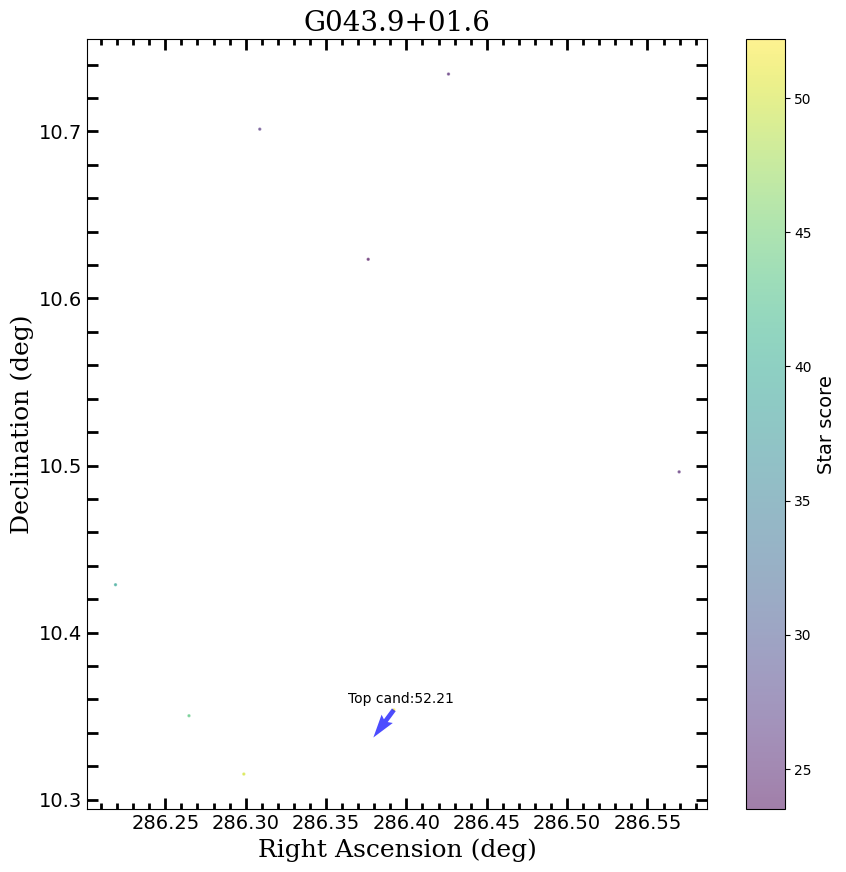

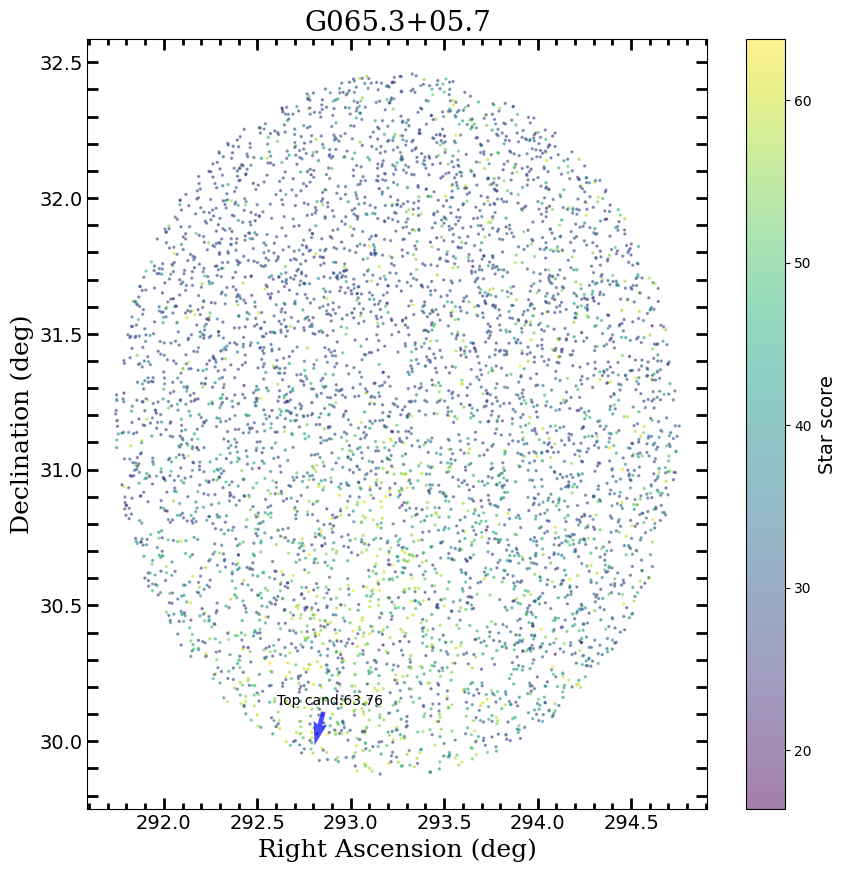

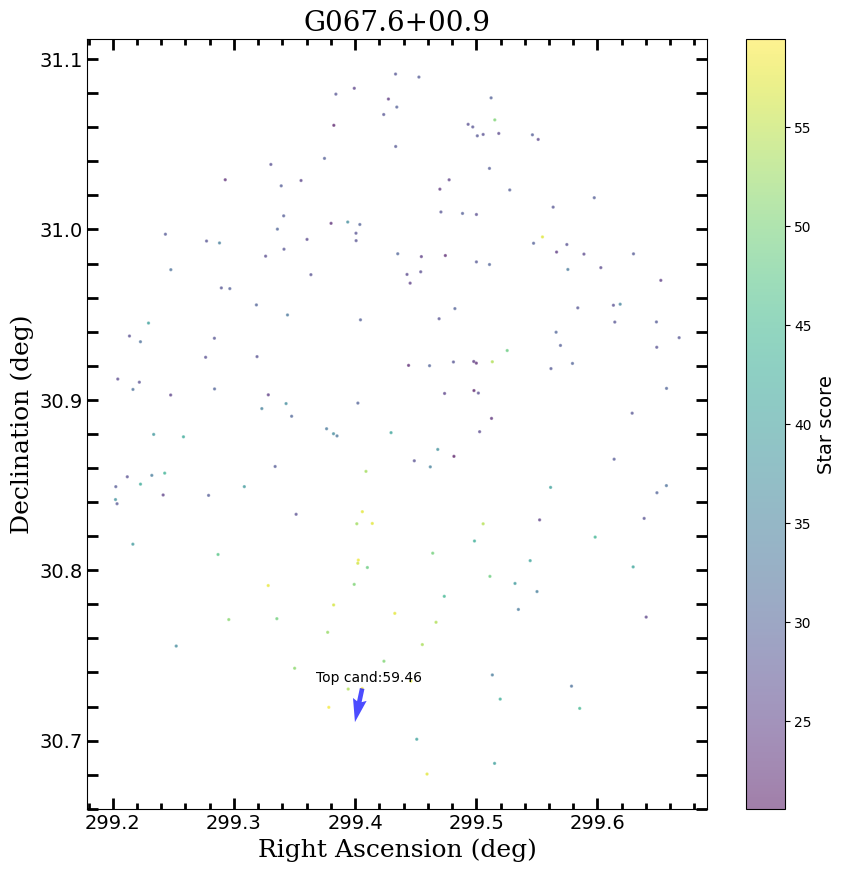

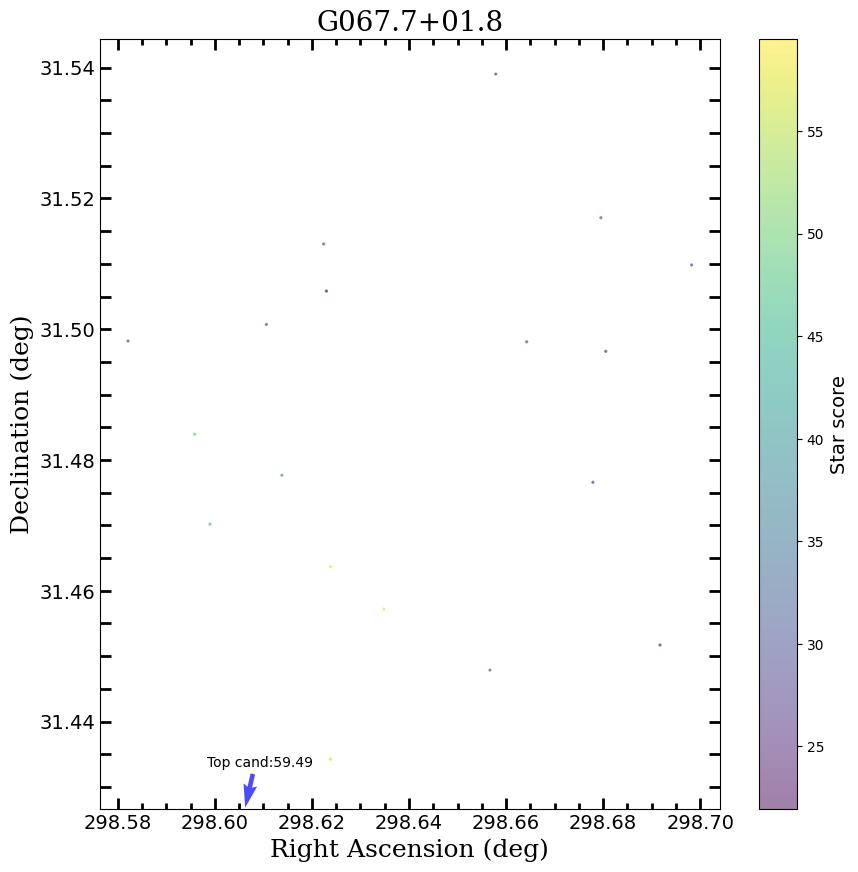

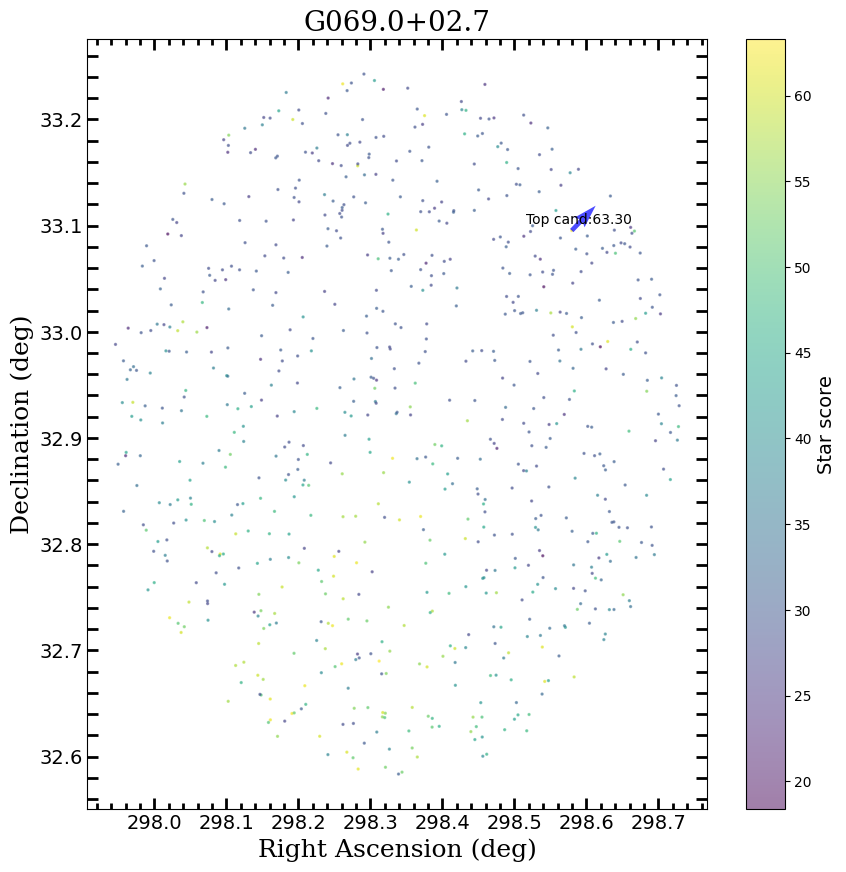

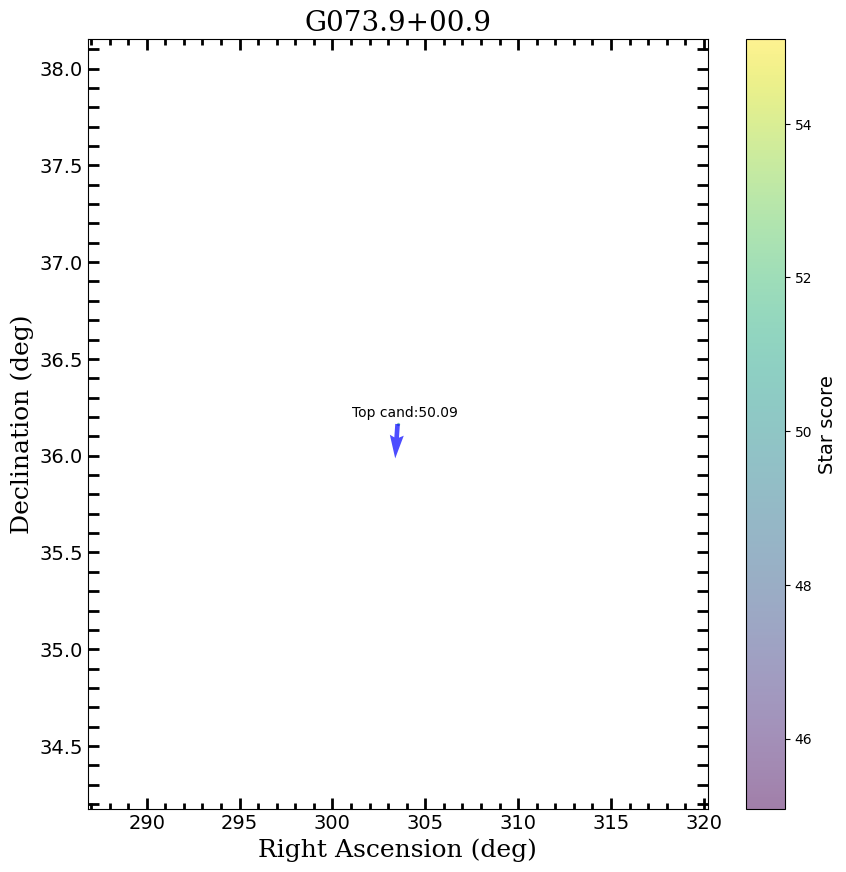

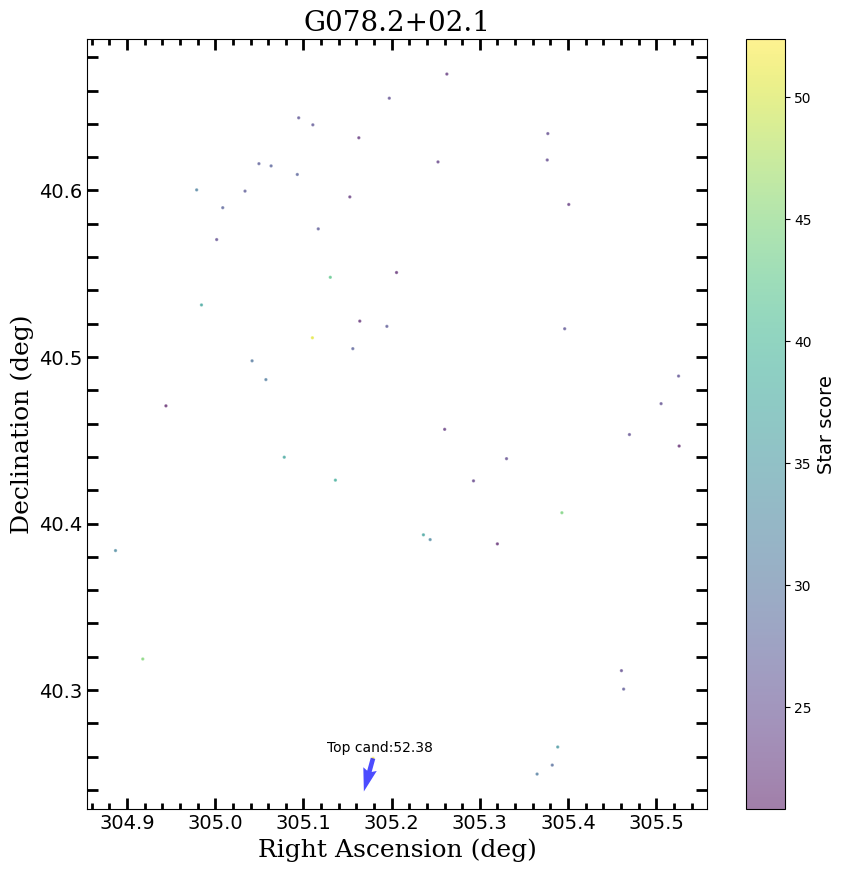

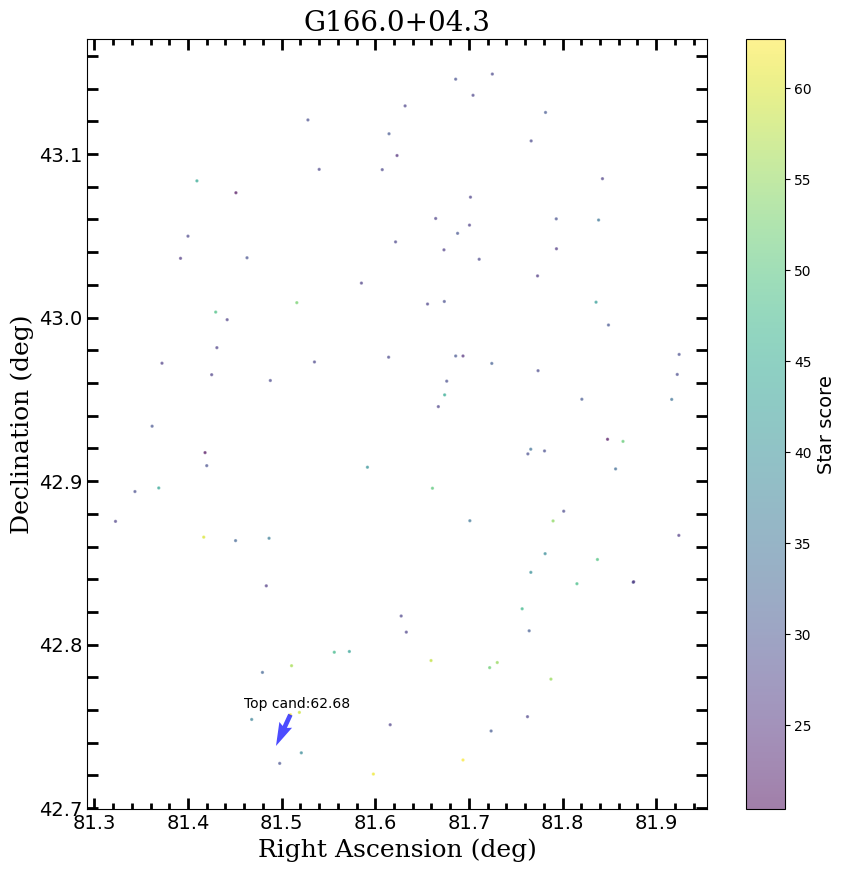

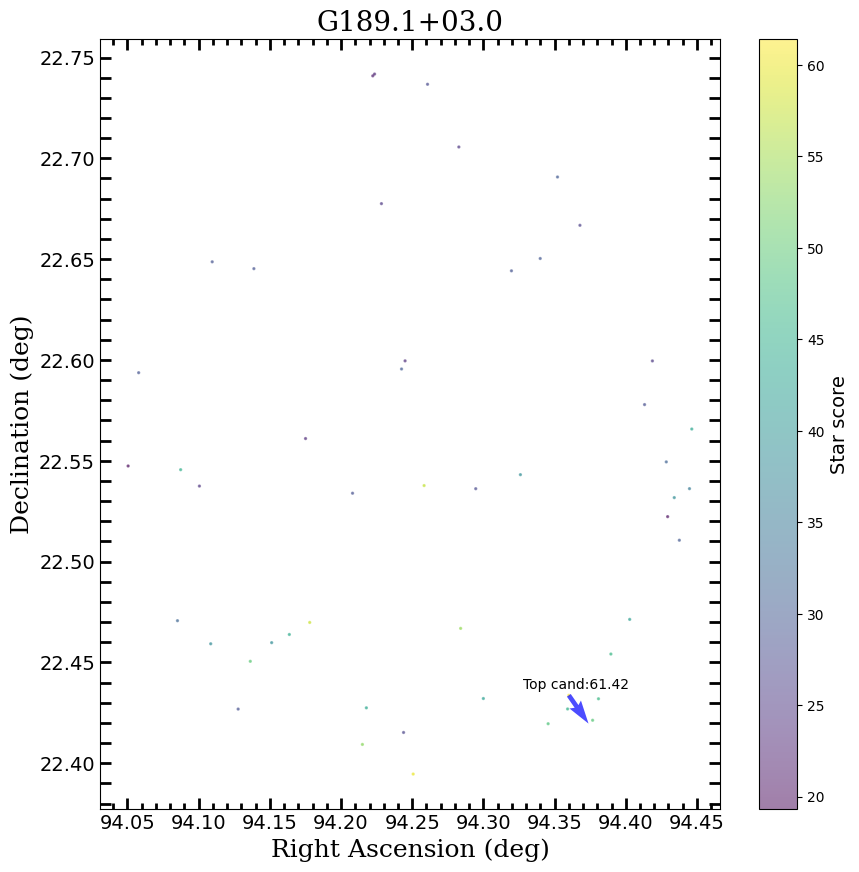

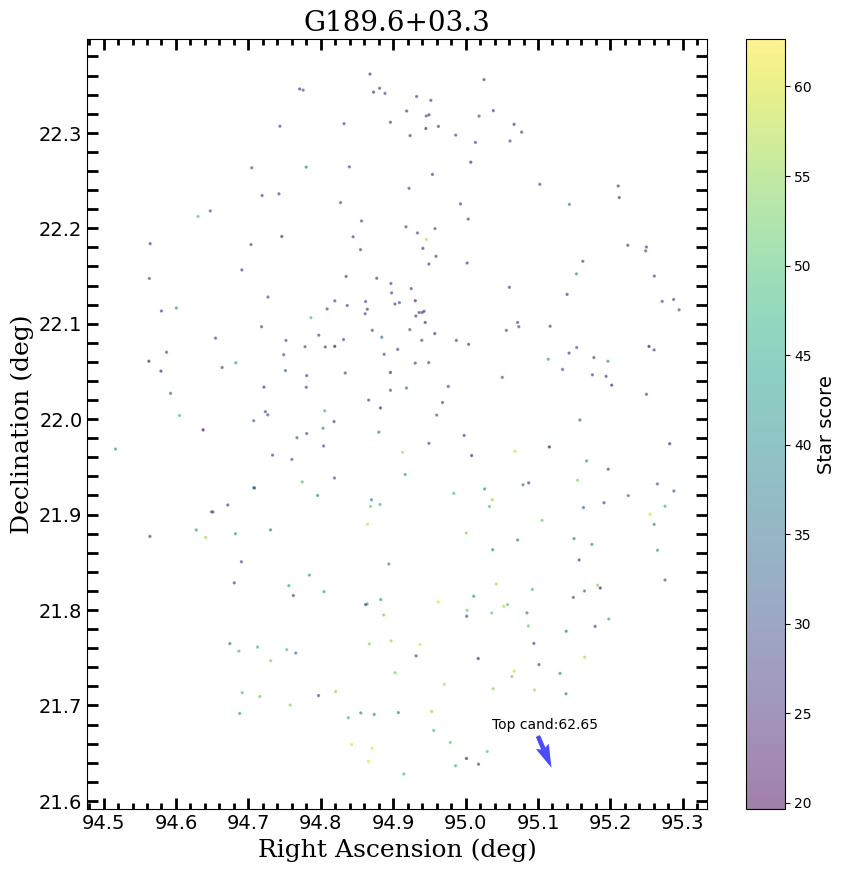

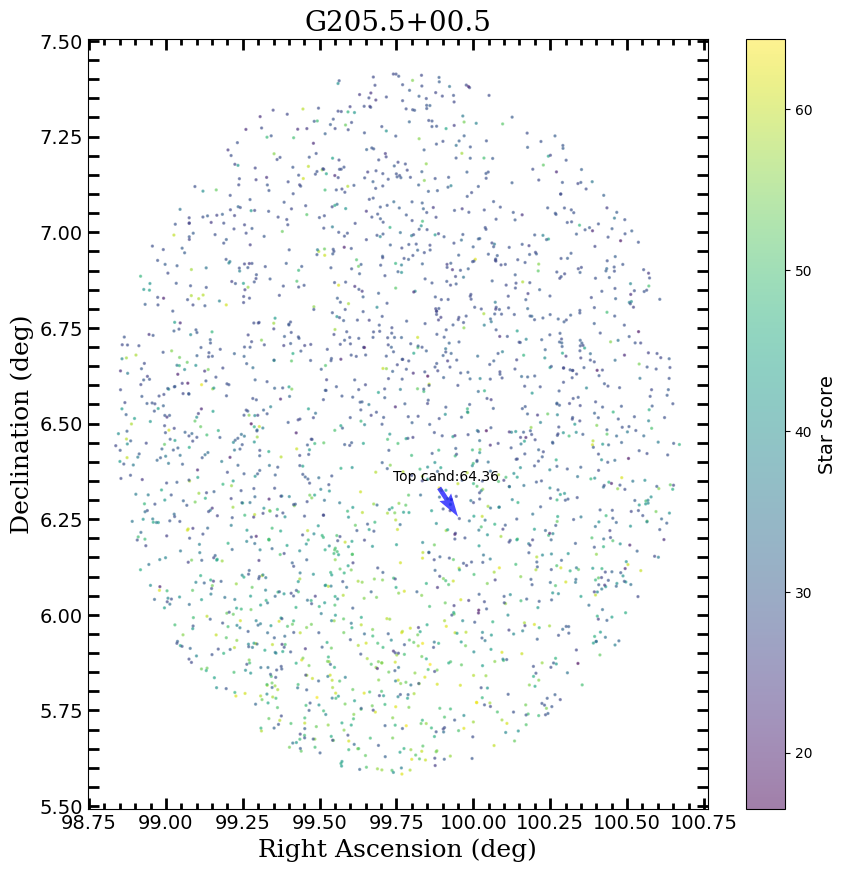

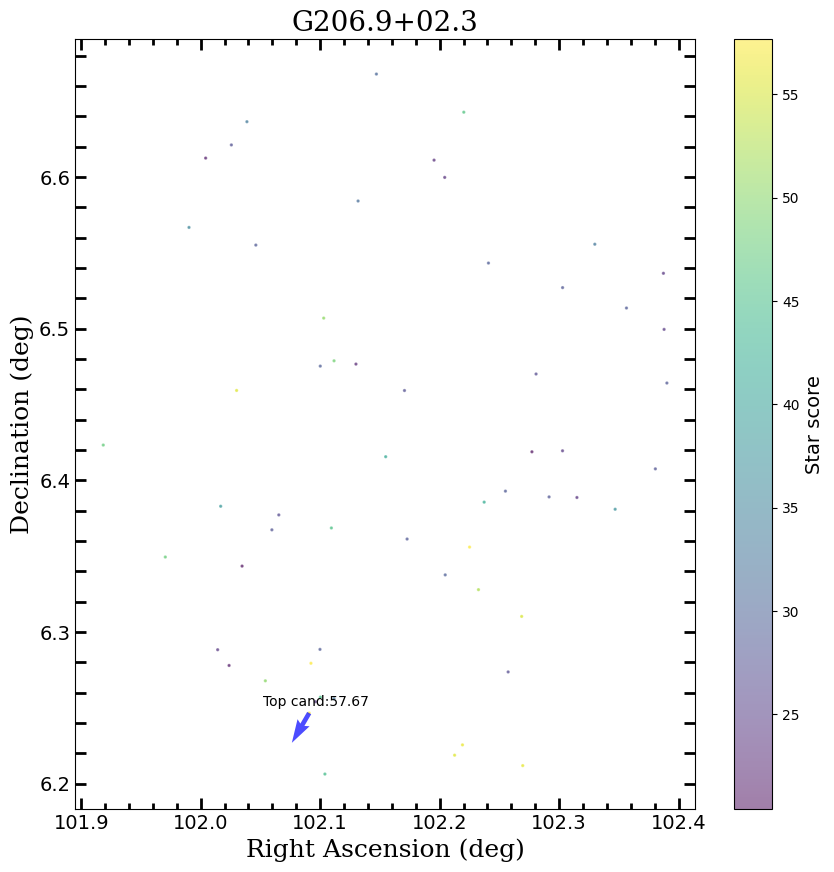

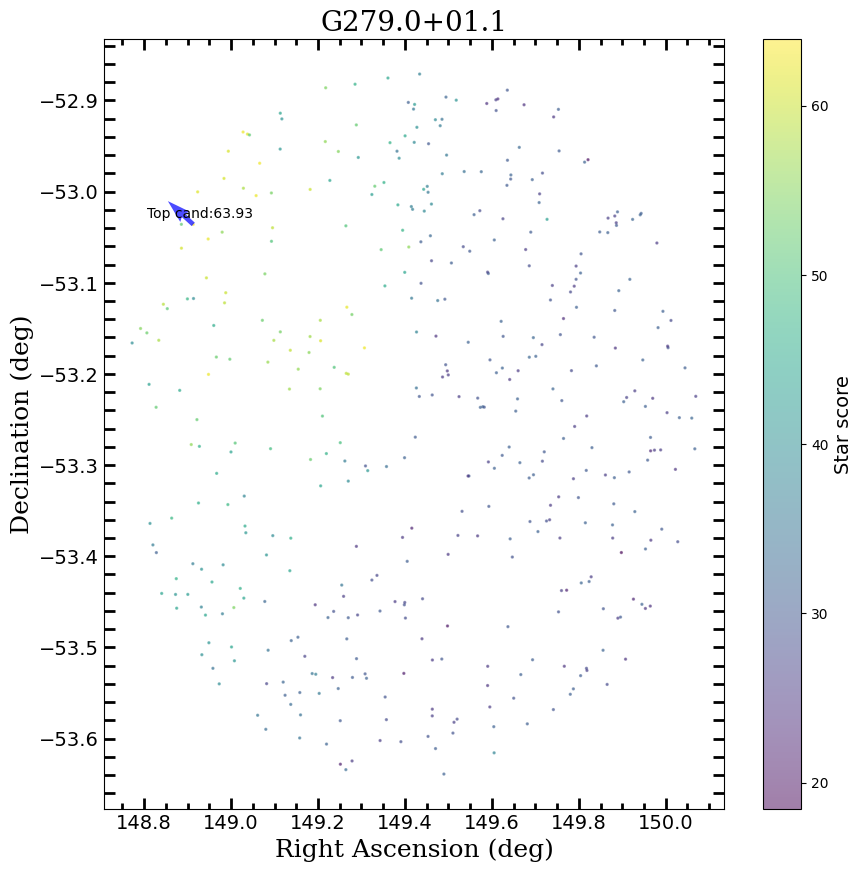

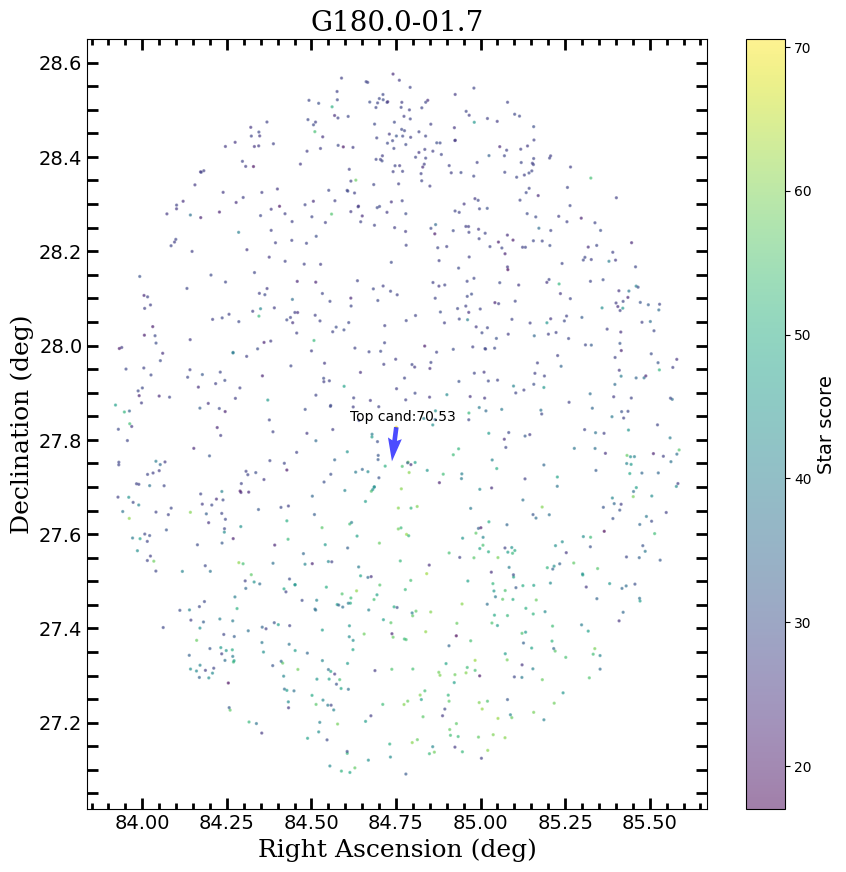

In [16]:
for name,df_t in dfs.items():
    plot_radec(df_t, plot_pm_dir=None,make_title=True,add_score=True)

In [17]:
dfs.keys()

dict_keys(['G024.7+00.6', 'G043.9+01.6', 'G065.3+05.7', 'G065.7+01.2', 'G067.6+00.9', 'G067.7+01.8', 'G069.0+02.7', 'G073.9+00.9', 'G078.2+02.1', 'G160.9+02.6', 'G166.0+04.3', 'G181.1+09.5', 'G189.1+03.0', 'G189.6+03.3', 'G205.5+00.5', 'G206.9+02.3', 'G279.0+01.1', 'G180.0-01.7'])

In [18]:
g181 = dfs['G181.1+09.5']

In [19]:
g181[g181['pm_km_s']==g181['pm_km_s'].max()]

source_id         ra       dec  parallax  parallax_error  \
65  3439382361503480960  96.606537  32.55994  0.623313        0.031109   

        pmra      pmdec         pm  phot_g_mean_mag     bp_rp  ...  Ang_size  \
65 -2.831913 -25.152701  25.311619        15.247389  0.995099  ...      74.0   

   median_dist  median_dist_error     snr_ra  snr_dec      dist_pc  \
65         1.5                1.0  96.666667     32.5  1604.330236   

       pm_km_s  total_vel     snr_sep      score  
65  192.482848        NaN  282.613925  31.691371  

[1 rows x 22 columns]

In [20]:
g069 = dfs['G069.0+02.7']

/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/matplotlib/quiver.py:678: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


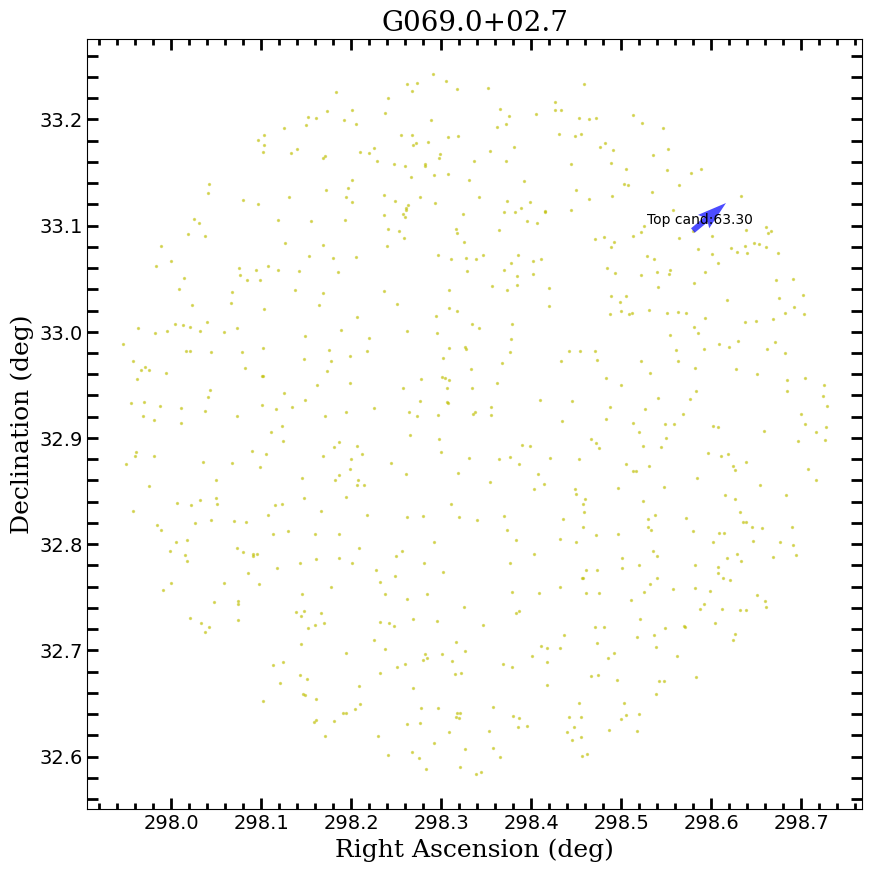

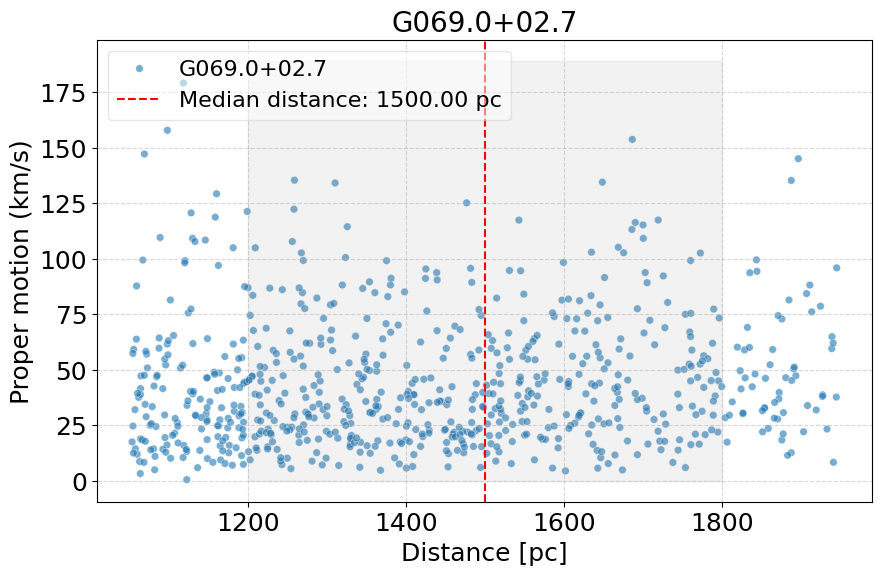

In [21]:
g069[g069['pm_km_s']==g069['pm_km_s'].max()]
plot_radec(g069, plot_pm_dir=200,make_title=True)
plot_pm_vs_radial_velocity(g069,median_dist=True,make_title=True)

/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/matplotlib/quiver.py:678: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


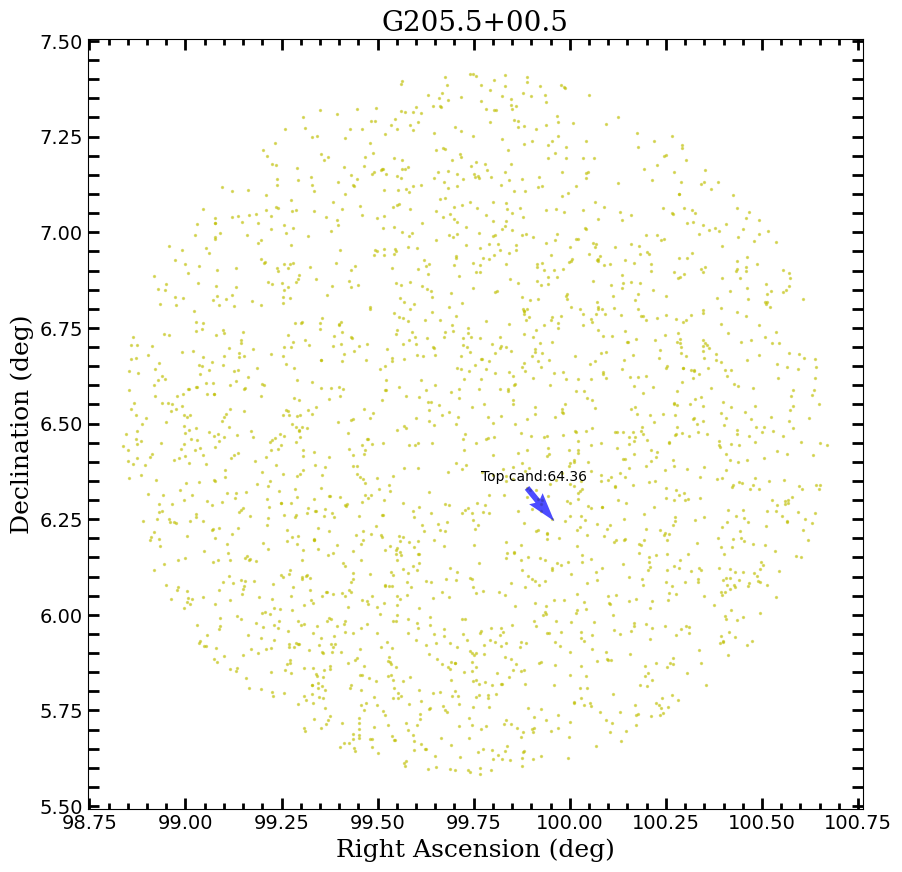

In [22]:
g205 = dfs['G205.5+00.5']
plot_radec(g205, plot_pm_dir=300,make_title=True)
plot_pm_vs_radial_velocity(g205,median_dist=True,make_title=True)

In [23]:
dfs['G205.5+00.5']['score'].max()

np.float64(64.36433921747205)

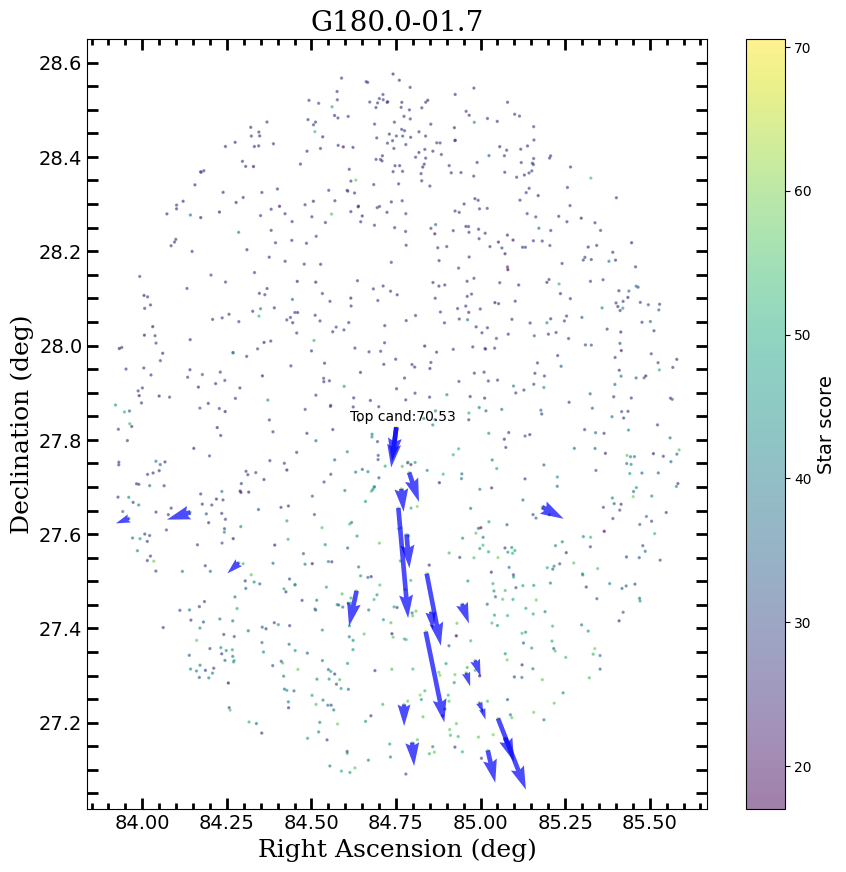

In [24]:
plot_radec(dfs['G180.0-01.7'], plot_pm_dir=60,make_title=True,draw_star_ID=None,add_score=True)

In [25]:
plot_radec(g205, plot_pm_dir=63,make_title=True,draw_star_ID=3133486093371718656,add_score=True)

#id=3133486093371718656


/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/home/lordrick/miniconda3/envs/frb_env/lib/python3.12/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


In [26]:
g205.columns

Index(['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec',
       'pm', 'phot_g_mean_mag', 'bp_rp', 'radial_velocity', 'Object',
       'Ang_size', 'median_dist', 'median_dist_error', 'snr_ra', 'snr_dec',
       'dist_pc', 'pm_km_s', 'total_vel', 'snr_sep', 'score'],
      dtype='object')

In [27]:
g205

source_id          ra       dec  parallax  parallax_error  \
0     3133406383079083776   99.888729  6.331775  0.707245        0.034061   
1     3131125648067792896   99.859387  5.870368  1.003182        0.040731   
2     3131868269391622272   99.491444  5.784035  1.065963        0.029330   
3     3131114038773416320   99.781802  5.710109  0.771162        0.023371   
4     3131109572007310592  100.010313  5.771345  1.047232        0.046713   
...                   ...         ...       ...       ...             ...   
2169  3132629681192429824  100.017522  6.012220  0.688310        0.017040   
2170  3132614528547763072  100.340246  5.872991  0.903063        0.015922   
2171  3133432462121395968  100.042283  6.481164  0.691546        0.025069   
2172  3133468608564950272   99.277491  6.499269  0.978576        0.015073   
2173  3133485410477229824   99.851596  6.623873  0.716742        0.016119   

          pmra      pmdec         pm  phot_g_mean_mag     bp_rp  ...  \
0     4.879580  -5.977376   7.716173        15.378243  0.959915  ...   
1     1.788535 -10.285051  10.439404        15.386752  1.042501  ...   
2    -3.705556  -9.463577  10.163191        15.186690  0.950628  ...   
3     0.224039 -11.110106  11.112365        14.490290  0.905557  ...   
4     3.766419 -13.197376  13.724309        15.328478  0.952936  ...   
...        ...        ...        ...              ...       ...  ...   
2169 -1.063421  -0.061579   1.065203        11.807397  2.053568  ...   
2170  0.991397   3.325133   3.469781        10.070911  1.533271  ...   
2171 -3.718587  -0.896755   3.825188        10.171197  1.817774  ...   
2172  0.233126   0.108573   0.257169        10.919142  1.364801  ...   
2173  0.615560  -2.009719   2.101877         9.442337  1.660965  ...   

      Ang_size median_dist  median_dist_error  snr_ra  snr_dec      dist_pc  \
0        220.0        1.15                0.3   99.75      6.5  1413.937596   
1        220.0        1.15                0.3   99.75      6.5   996.827960   
2        220.0        1.15                0.3   99.75      6.5   938.119108   
3        220.0        1.15                0.3   99.75      6.5  1296.744234   
4        220.0        1.15                0.3   99.75      6.5   954.897986   
...        ...         ...                ...     ...      ...          ...   
2169     220.0        1.15                0.3   99.75      6.5  1452.832838   
2170     220.0        1.15                0.3   99.75      6.5  1107.342936   
2171     220.0        1.15                0.3   99.75      6.5  1446.036103   
2172     220.0        1.15                0.3   99.75      6.5  1021.893492   
2173     220.0        1.15                0.3   99.75      6.5  1395.203142   

        pm_km_s  total_vel      snr_sep      score  
0     51.714287        NaN   782.989185  64.364339  
1     49.325814        NaN  2300.235367  63.951947  
2     45.192505        NaN  2738.583344  63.436460  
3     68.302903  68.869354  2845.886565  63.392452  
4     62.119193        NaN  2783.724582  63.147422  
...         ...        ...          ...        ...  
2169   7.335440  51.077960  2000.014643  17.735854  
2170  18.212204  32.967582  3091.560908  17.275856  
2171  26.218644  27.366940  1047.672564  17.227288  
2172   1.245668  60.295729  1690.100294  16.688126  
2173  13.900263  47.147034   575.229117  16.490393  

[2174 rows x 22 columns]

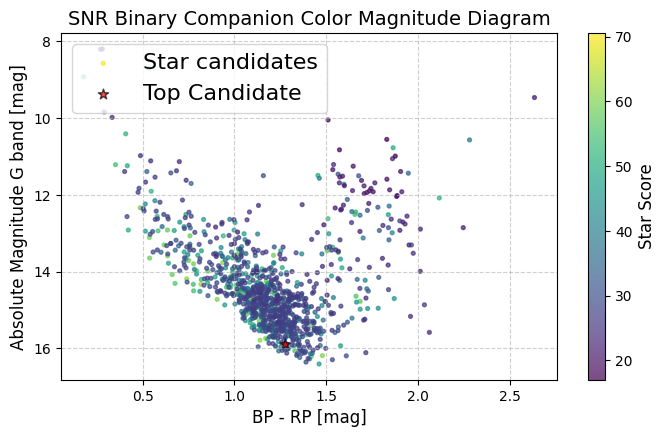

In [28]:
plot_cmd(dfs['G180.0-01.7'],save_file='g180_cmd.png',ssize=30)

In [29]:
# Sort by score
g205

source_id          ra       dec  parallax  parallax_error  \
0     3133406383079083776   99.888729  6.331775  0.707245        0.034061   
1     3131125648067792896   99.859387  5.870368  1.003182        0.040731   
2     3131868269391622272   99.491444  5.784035  1.065963        0.029330   
3     3131114038773416320   99.781802  5.710109  0.771162        0.023371   
4     3131109572007310592  100.010313  5.771345  1.047232        0.046713   
...                   ...         ...       ...       ...             ...   
2169  3132629681192429824  100.017522  6.012220  0.688310        0.017040   
2170  3132614528547763072  100.340246  5.872991  0.903063        0.015922   
2171  3133432462121395968  100.042283  6.481164  0.691546        0.025069   
2172  3133468608564950272   99.277491  6.499269  0.978576        0.015073   
2173  3133485410477229824   99.851596  6.623873  0.716742        0.016119   

          pmra      pmdec         pm  phot_g_mean_mag     bp_rp  ...  \
0     4.879580  -5.977376   7.716173        15.378243  0.959915  ...   
1     1.788535 -10.285051  10.439404        15.386752  1.042501  ...   
2    -3.705556  -9.463577  10.163191        15.186690  0.950628  ...   
3     0.224039 -11.110106  11.112365        14.490290  0.905557  ...   
4     3.766419 -13.197376  13.724309        15.328478  0.952936  ...   
...        ...        ...        ...              ...       ...  ...   
2169 -1.063421  -0.061579   1.065203        11.807397  2.053568  ...   
2170  0.991397   3.325133   3.469781        10.070911  1.533271  ...   
2171 -3.718587  -0.896755   3.825188        10.171197  1.817774  ...   
2172  0.233126   0.108573   0.257169        10.919142  1.364801  ...   
2173  0.615560  -2.009719   2.101877         9.442337  1.660965  ...   

      Ang_size median_dist  median_dist_error  snr_ra  snr_dec      dist_pc  \
0        220.0        1.15                0.3   99.75      6.5  1413.937596   
1        220.0        1.15                0.3   99.75      6.5   996.827960   
2        220.0        1.15                0.3   99.75      6.5   938.119108   
3        220.0        1.15                0.3   99.75      6.5  1296.744234   
4        220.0        1.15                0.3   99.75      6.5   954.897986   
...        ...         ...                ...     ...      ...          ...   
2169     220.0        1.15                0.3   99.75      6.5  1452.832838   
2170     220.0        1.15                0.3   99.75      6.5  1107.342936   
2171     220.0        1.15                0.3   99.75      6.5  1446.036103   
2172     220.0        1.15                0.3   99.75      6.5  1021.893492   
2173     220.0        1.15                0.3   99.75      6.5  1395.203142   

        pm_km_s  total_vel      snr_sep      score  
0     51.714287        NaN   782.989185  64.364339  
1     49.325814        NaN  2300.235367  63.951947  
2     45.192505        NaN  2738.583344  63.436460  
3     68.302903  68.869354  2845.886565  63.392452  
4     62.119193        NaN  2783.724582  63.147422  
...         ...        ...          ...        ...  
2169   7.335440  51.077960  2000.014643  17.735854  
2170  18.212204  32.967582  3091.560908  17.275856  
2171  26.218644  27.366940  1047.672564  17.227288  
2172   1.245668  60.295729  1690.100294  16.688126  
2173  13.900263  47.147034   575.229117  16.490393  

[2174 rows x 22 columns]

In [30]:
plot_pm_vs_radial_velocity(g205,median_dist=True,add_score=True,make_title=True)